<a href="https://colab.research.google.com/github/Korniev/Data-Sciense/blob/main/hw_11/hw_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Домашнє завдання № 11

В якості домашнього завдання вам пропонується створити рекурентну нейронну мережу за допомогою механізмів Keras, яка буде класифікувати рецензії із датасету imdb.

На відміну від прикладу в модулі 9 ми використаємо рекурентну нейронну мережу. Поекспериментуйте з будовою мережі - RNN, LSTM, двостороння та глибока.

Порівняйте результати та зробіть висновки.

Імпортуємо усі потрібні нам бібліотеки:

In [1]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, Dropout
from keras.regularizers import l2

##Звичайна RNN

Супер, почнемо з реалізаціїї звичайної базової RNN і подивимось на результати, які ми отримаємо.

Для початку потрібно завантажити датасет imdb

Для цього встановлюємо гіперпараметри:

In [76]:
max_features = 10000
maxlen = 500

І завантажимо датасет imdb:

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 [==============================] - 0s 0us/step


Далі зробимо так званий паддінг послідовностей, тобто, перетворемо відгуки на вектори:

In [4]:
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

Далі будуємо нашу базову RNN:

In [22]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))

І робимо компліляцію, в якій передаємо оптимізатор RMSprop, функцію втрат бінарної кросентропії та у якості метрики як завжди передаємо точність:

In [23]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

Відобразимо нашу архітектуру моделі:

In [24]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Далі проводимо навчання нашої моделі на 6 епохах та розміром бачу у 128:

In [25]:
history = model.fit(x_train, y_train, epochs=6, batch_size=128, validation_split=0.3)

Epoch 1/6
137/137 [==============================] - 24s 165ms/step - loss: 0.6334 - acc: 0.6513 - val_loss: 0.5548 - val_acc: 0.7279
Epoch 2/6
137/137 [==============================] - 23s 167ms/step - loss: 0.4248 - acc: 0.8291 - val_loss: 0.3879 - val_acc: 0.8508
Epoch 3/6
137/137 [==============================] - 22s 158ms/step - loss: 0.3463 - acc: 0.8742 - val_loss: 0.3948 - val_acc: 0.8488
Epoch 4/6
137/137 [==============================] - 20s 149ms/step - loss: 0.3045 - acc: 0.8919 - val_loss: 0.4312 - val_acc: 0.8275
Epoch 5/6
137/137 [==============================] - 22s 163ms/step - loss: 0.2662 - acc: 0.9110 - val_loss: 0.3623 - val_acc: 0.8664
Epoch 6/6
137/137 [==============================] - 22s 163ms/step - loss: 0.2326 - acc: 0.9235 - val_loss: 0.3753 - val_acc: 0.8657


Також візуалізуємо отримані результати функцій втрат та метрики точності:

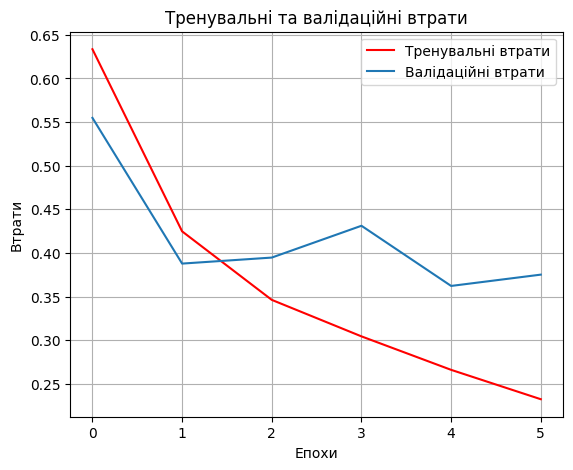

In [26]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Тренувальні втрати', color='red')
plt.plot(history.history['val_loss'], label='Валідаційні втрати')
plt.title('Тренувальні та валідаційні втрати RNN')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.grid(True)
plt.legend()


plt.show()

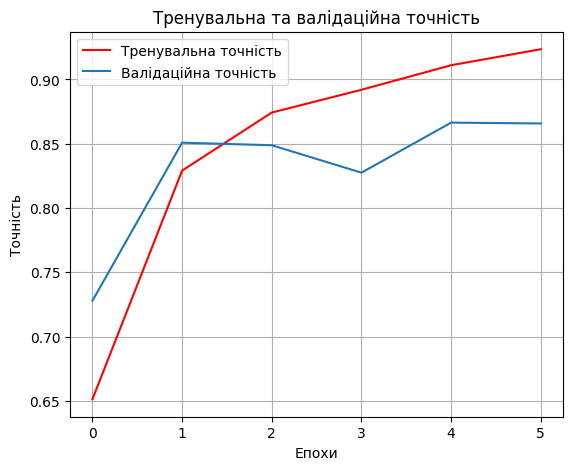

In [27]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='Тренувальна точність', color='red')
plt.plot(history.history['val_acc'], label='Валідаційна точність')
plt.title('Тренувальна та валідаційна точність RNN')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.grid(True)
plt.legend()

plt.show()

Після навчання моделі, ми можете оцінити її ефективність на тестовому наборі даних:

In [28]:
predictions = model.predict(x_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}\n")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Тестові втрати: {}'.format(test_loss))
print('Тестова точність: {}'.format(test_acc))


782/782 [==============================] - 19s 24ms/step
Прогнозоване: 0, Фактичне: 0

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 0, Фактичне: 1

Прогнозоване: 0, Фактичне: 0

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 0, Фактичне: 0

Прогнозоване: 1, Фактичне: 0

Прогнозоване: 1, Фактичне: 1

782/782 [==============================] - 19s 24ms/step - loss: 0.3921 - acc: 0.8548
Тестові втрати: 0.3920994997024536
Тестова точність: 0.8548399806022644


Як бачимо, не найкращі результати. Хоча на тренувальних даних ми доходимо до точності у 95%, то на тестових - тільки 80..

Тому я застосував для повнозвʼязного шару Dense коефіцієнт регуляризації L2 0.01 для того, щоб зменшити перенавчання.  Зараз на виході наша модель показує 92% точності на тренувальних і 87% точності на тестових даних.

Як бачимо з наших прогнозів, то в нас правильно розпізнало 8 з 10 рецензів. Що як раз нам дає наші 87% точності на тестових даних.

##LSTM RNN

Тепер давайте спробуємо зробити те саме, але використовуючи тип архітектури рекурентних нейронних мереж LSTM

Для цього імпортуємо потрібні шари LSTM RNN:

In [5]:
from keras.layers import Embedding, LSTM

Побудуємо нашу модель LSTM:

In [7]:
model = Sequential()
model.add(Embedding(max_features, 32, input_length=maxlen))
model.add(LSTM(32))
Dropout(0.1)
model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.05)))

In [8]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

Подивимось на архітектуру нашої LSTM RNN:

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           320000    
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Далі проводимо навчання нашої моделі на 6 епохах та розміром бачу у 128:

In [10]:
history = model.fit(x_train, y_train, epochs=6, batch_size=128, validation_split=0.3)

Epoch 1/6
137/137 [==============================] - 21s 128ms/step - loss: 0.7243 - acc: 0.5809 - val_loss: 0.6356 - val_acc: 0.6879
Epoch 2/6
137/137 [==============================] - 13s 97ms/step - loss: 0.5494 - acc: 0.7821 - val_loss: 0.6647 - val_acc: 0.6620
Epoch 3/6
137/137 [==============================] - 11s 79ms/step - loss: 0.4721 - acc: 0.8343 - val_loss: 0.4468 - val_acc: 0.8415
Epoch 4/6
137/137 [==============================] - 10s 71ms/step - loss: 0.4014 - acc: 0.8696 - val_loss: 0.4085 - val_acc: 0.8608
Epoch 5/6
137/137 [==============================] - 7s 54ms/step - loss: 0.3626 - acc: 0.8910 - val_loss: 0.4092 - val_acc: 0.8568
Epoch 6/6
137/137 [==============================] - 8s 56ms/step - loss: 0.3360 - acc: 0.9025 - val_loss: 0.3950 - val_acc: 0.8701


Також візуалізуємо отримані результати функцій втрат та метрики точності:

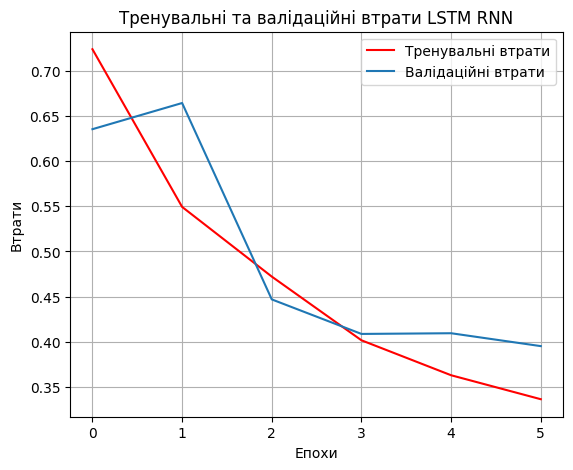

In [11]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Тренувальні втрати', color='red')
plt.plot(history.history['val_loss'], label='Валідаційні втрати')
plt.title('Тренувальні та валідаційні втрати LSTM RNN')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.grid(True)
plt.legend()


plt.show()

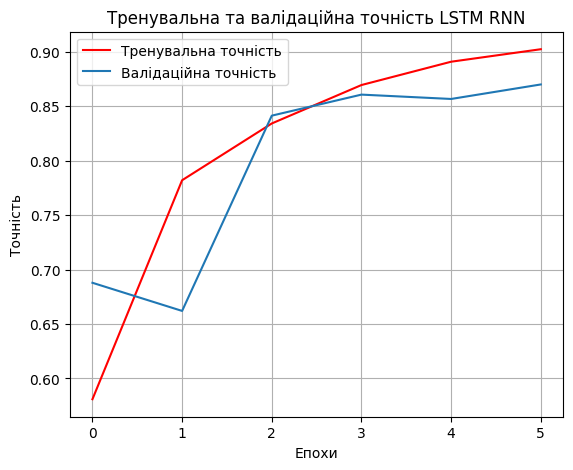

In [12]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='Тренувальна точність', color='red')
plt.plot(history.history['val_acc'], label='Валідаційна точність')
plt.title('Тренувальна та валідаційна точність LSTM RNN')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.grid(True)
plt.legend()

plt.show()

Після навчання моделі, ми можете оцінити її ефективність на тестовому наборі даних:

In [13]:
predictions = model.predict(x_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}\n")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Тестові втрати: {}'.format(test_loss))
print('Тестова точність: {}'.format(test_acc))

782/782 [==============================] - 8s 10ms/step
Прогнозоване: 0, Фактичне: 0

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 1, Фактичне: 0

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 0, Фактичне: 0

Прогнозоване: 1, Фактичне: 0

Прогнозоване: 1, Фактичне: 1

782/782 [==============================] - 7s 8ms/step - loss: 0.4091 - acc: 0.8589
Тестові втрати: 0.4090852737426758
Тестова точність: 0.8589199781417847


##GRU RNN

Тепер побудуємо модель GRU, яка є спрощеною версією LSTM, що використовує меншу кількість вентилів для регулювання інформаційного потоку через шар.

Імпортуємо шари GRU

In [14]:
from keras.layers import Embedding, GRU

Побудуємо модель GRN RNN:

In [34]:
model = Sequential()
model.add(Embedding(max_features, 32, input_length=maxlen))
model.add(GRU(32))
Dropout(0.2)
model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))

In [35]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [36]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 500, 32)           320000    
                                                                 
 gru_4 (GRU)                 (None, 32)                6336      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 326369 (1.24 MB)
Trainable params: 326369 (1.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Натренуємо нашу модель на 6 епохах і бач 128:

In [37]:
history = model.fit(x_train, y_train, epochs=6, batch_size=128, validation_split=0.3)

Epoch 1/6
137/137 [==============================] - 14s 89ms/step - loss: 0.6988 - acc: 0.5686 - val_loss: 0.6704 - val_acc: 0.6317
Epoch 2/6
137/137 [==============================] - 9s 63ms/step - loss: 0.4910 - acc: 0.7778 - val_loss: 0.3950 - val_acc: 0.8384
Epoch 3/6
137/137 [==============================] - 8s 59ms/step - loss: 0.3472 - acc: 0.8643 - val_loss: 0.3934 - val_acc: 0.8397
Epoch 4/6
137/137 [==============================] - 8s 56ms/step - loss: 0.2979 - acc: 0.8917 - val_loss: 0.3599 - val_acc: 0.8577
Epoch 5/6
137/137 [==============================] - 6s 46ms/step - loss: 0.2699 - acc: 0.9062 - val_loss: 0.3449 - val_acc: 0.8655
Epoch 6/6
137/137 [==============================] - 6s 41ms/step - loss: 0.2501 - acc: 0.9159 - val_loss: 0.3597 - val_acc: 0.8609


Також візуалізуємо отримані результати функцій втрат та метрики точності:

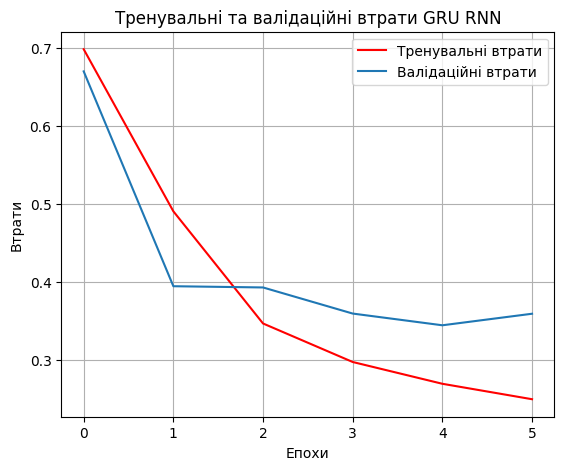

In [39]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Тренувальні втрати', color='red')
plt.plot(history.history['val_loss'], label='Валідаційні втрати')
plt.title('Тренувальні та валідаційні втрати GRU RNN')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.grid(True)
plt.legend()


plt.show()

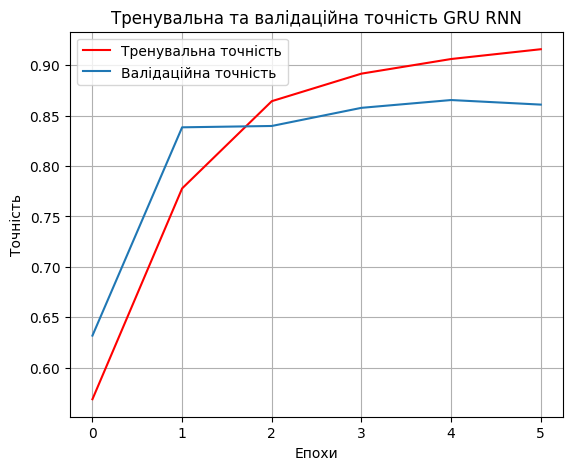

In [40]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='Тренувальна точність', color='red')
plt.plot(history.history['val_acc'], label='Валідаційна точність')
plt.title('Тренувальна та валідаційна точність GRU RNN')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.grid(True)
plt.legend()

plt.show()

Після навчання моделі, ми можете оцінити її ефективність на тестовому наборі даних:

In [41]:
predictions = model.predict(x_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}\n")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Тестові втрати: {}'.format(test_loss))
print('Тестова точність: {}'.format(test_acc))

782/782 [==============================] - 7s 8ms/step
Прогнозоване: 0, Фактичне: 0

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 1, Фактичне: 0

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 0, Фактичне: 0

Прогнозоване: 1, Фактичне: 0

Прогнозоване: 1, Фактичне: 1

782/782 [==============================] - 7s 9ms/step - loss: 0.3630 - acc: 0.8572
Тестові втрати: 0.36298346519470215
Тестова точність: 0.8572400212287903


##Bidirectional(двостороння) RNN

Імпортуємо потрібні шари:

In [43]:
from keras.layers import Embedding, Bidirectional, LSTM

Побудуємо модель BRNN:

In [69]:
model = Sequential()
model.add(Embedding(max_features, 32, input_length=maxlen))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
Dropout(0.1)
model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.1)))

In [70]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [71]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 500, 32)           320000    
                                                                 
 bidirectional_9 (Bidirecti  (None, 500, 64)           16640     
 onal)                                                           
                                                                 
 bidirectional_10 (Bidirect  (None, 64)                24832     
 ional)                                                          
                                                                 
 dense_12 (Dense)            (None, 1)                 65        
                                                                 
Total params: 361537 (1.38 MB)
Trainable params: 361537 (1.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Натренуємо нашу модель на 6 епохах і бач 128:

In [72]:
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 [==============================] - 25s 135ms/step - loss: 0.7694 - acc: 0.5254 - val_loss: 0.7052 - val_acc: 0.5625
Epoch 2/5
137/137 [==============================] - 15s 111ms/step - loss: 0.5712 - acc: 0.7475 - val_loss: 0.4691 - val_acc: 0.8280
Epoch 3/5
137/137 [==============================] - 15s 107ms/step - loss: 0.4124 - acc: 0.8589 - val_loss: 0.4050 - val_acc: 0.8585
Epoch 4/5
137/137 [==============================] - 14s 105ms/step - loss: 0.3411 - acc: 0.8918 - val_loss: 0.4120 - val_acc: 0.8496
Epoch 5/5
137/137 [==============================] - 14s 102ms/step - loss: 0.2997 - acc: 0.9129 - val_loss: 0.3530 - val_acc: 0.8771


Також візуалізуємо отримані результати функцій втрат та метрики точності:

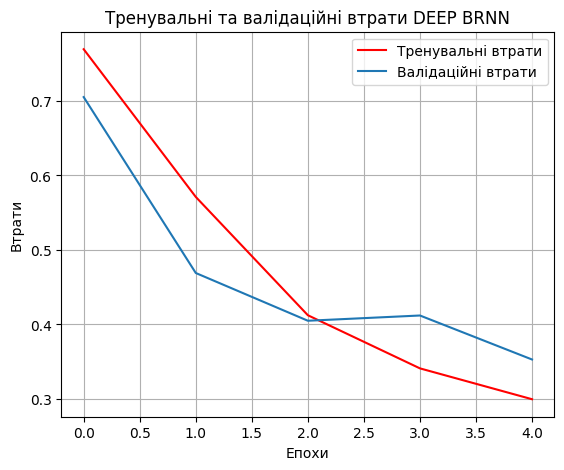

In [73]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Тренувальні втрати', color='red')
plt.plot(history.history['val_loss'], label='Валідаційні втрати')
plt.title('Тренувальні та валідаційні втрати DEEP BRNN')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.grid(True)
plt.legend()


plt.show()

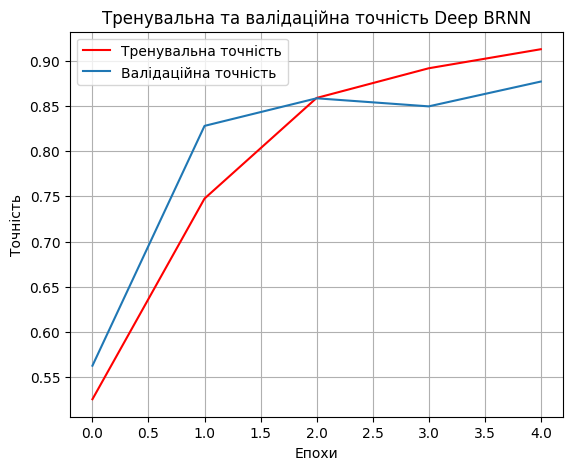

In [74]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='Тренувальна точність', color='red')
plt.plot(history.history['val_acc'], label='Валідаційна точність')
plt.title('Тренувальна та валідаційна точність Deep BRNN')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.grid(True)
plt.legend()

plt.show()

Після навчання моделі, ми можете оцінити її ефективність на тестовому наборі даних:

In [75]:
predictions = model.predict(x_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}\n")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Тестові втрати: {}'.format(test_loss))
print('Тестова точність: {}'.format(test_acc))

782/782 [==============================] - 22s 26ms/step
Прогнозоване: 0, Фактичне: 0

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 0, Фактичне: 0

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 0, Фактичне: 1

Прогнозоване: 1, Фактичне: 1

Прогнозоване: 0, Фактичне: 0

Прогнозоване: 1, Фактичне: 0

Прогнозоване: 1, Фактичне: 1

782/782 [==============================] - 21s 27ms/step - loss: 0.3615 - acc: 0.8748
Тестові втрати: 0.36145153641700745
Тестова точність: 0.8748000264167786
